### 1.1 从什么叫“维度”说开来

对于数组和Series来说，维度就是功能shape返回的结果，shape中返回了几个数字，就是几维。

针对每一张表，维度指的是样本的数量或特征的数量，一般无特别说明，指的都是**特征的数量**。

降维算法中的”降维“，指的是降低特征矩阵中特征的数量。上周的课中我们说过，降维的目的是为了让算法运算更快，效果更好，但其实还有另一种需求：数据可视化。从上面的图我们其实可以看得出，图像和特征矩阵的维度是可以相互对应的，即一个特征对应一个特征向量，对应一条坐标轴。所以，三维及以下的特征矩阵，是可以被可视化的，这可以帮助我们很快地理解数据的分布，而三维以上特征矩阵的则不能被可视化，数据的性质也就比较难理解。

### 1.2 sklearn中的降维算法

sklearn中降维算法都被包括在模块decomposition中，这个模块本质是一个矩阵分解模块。在过去的十年中，如果要讨论算法进步的先锋，矩阵分解可以说是独树一帜。矩阵分解可以用在降维，深度学习，聚类分析，数据预处理，低纬度特征学习，推荐系统，大数据分析等领域。在2006年，Netflix曾经举办了一个奖金为100万美元的推荐系统算法比赛，最后的获奖者就使用了矩阵分解中的明星：奇异值分解SVD。

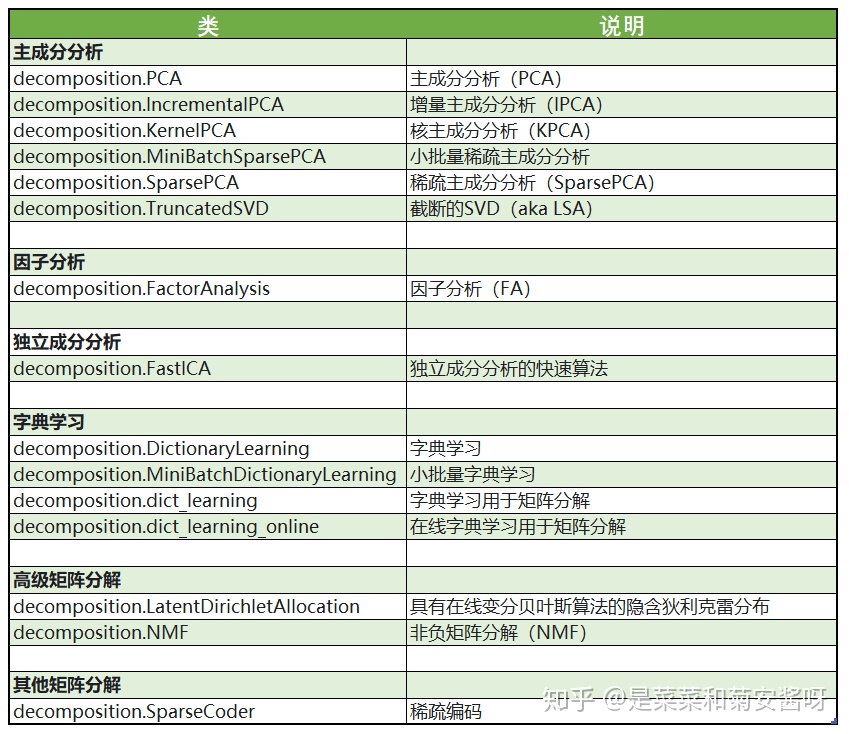

### 2.1 PCA与SVD

在降维过程中，我们会减少特征的数量，这意味着删除数据，数据量变少则表示模型可以获取的信息会变少，模型的表现可能会因此受影响。同时，在高维数据中，必然有一些特征是不带有有效的信息的（比如噪音），或者有一些特征带有的信息和其他一些特征是重复的（比如一些特征可能会线性相关）。我们希望能够找出一种办法来帮助我们衡量特征上所带的信息量，让我们在降维的过程中，能够**既减少特征的数量，又保留大部分有效信息——将那些带有重复信息的特征合并，并删除那些带无效信息的特征等等**——逐渐创造出能够代表原特征矩阵大部分信息的，特征更少的，新特征矩阵。

上周的特征工程课中，我们提到过一种重要的特征选择方法：方差过滤。**如果一个特征的方差很小，则意味着这个特征上很可能有大量取值都相同（比如90%都是1，只有10%是0，甚至100%是1），那这一个特征的取值对样本而言就没有区分度，这种特征就不带有有效信息。** 从方差的这种应用就可以推断出，如果一个特征的方差很大，则说明这个特征上带有大量的信息。因此，**在降维中，PCA使用的信息量衡量指标，就是样本方差，又称可解释性方差，方差越大，特征所带的信息量越多。**

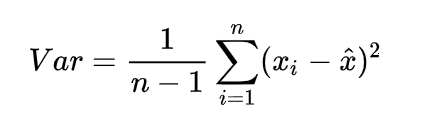

Var代表一个特征的方差，n代表样本量，xi代表一个特征中的每个样本取值,xhat代表这一列样本的均值。

* 为什么公式中除数是n-1?     
为了得到样本方差的无偏估计

### 2.2 降维是怎么实现的

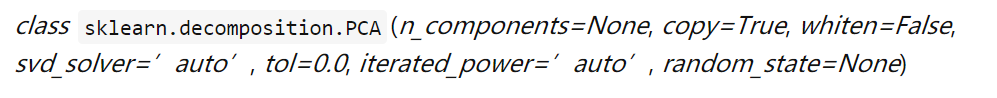

PCA作为矩阵分解算法的核心算法，其实没有太多参数，但不幸的是每个参数的意义和运用都很难，因为几乎每个参数都涉及到高深的数学原理。为了参数的运用和意义变得明朗，我们来看一组简单的二维数据的降维。

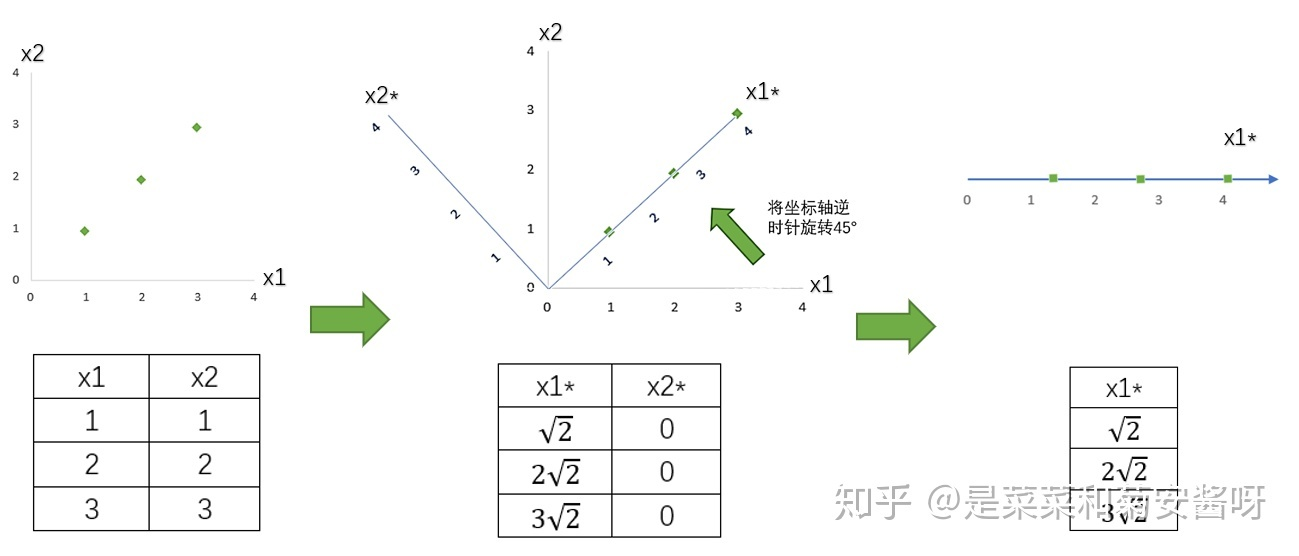

我们现在有一组简单的数据，有特征x1和x2，三个样本数据的坐标点分别为(1,1)，(2,2)，(3,3)。我们可以让x1和x2分别作为两个特征向量，很轻松地用一个二维平面来描述这组数据。这组数据现在每个特征的均值都为2，方差则等于：

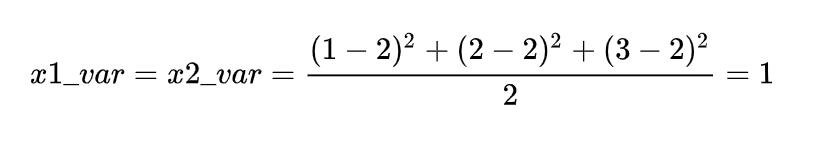

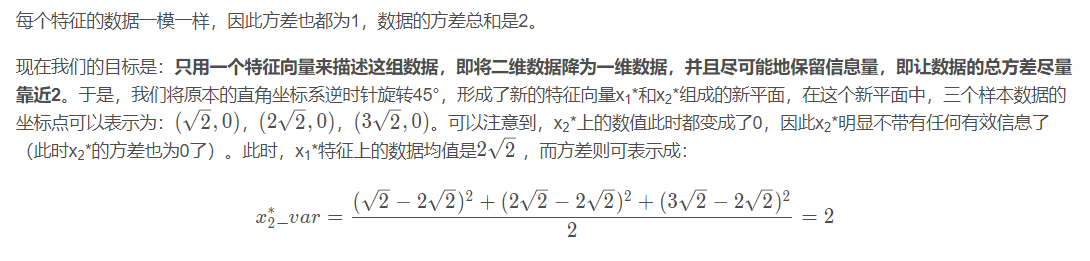

x2* 上的数据均值为0，方差也为0。

此时，我们根据信息含量的排序，取信息含量最大的一个特征，因为我们想要的是一维数据。所以我们可以将x2*删除，同时也删除图中的x2*特征向量，剩下的x1*就代表了曾经需要两个特征来代表的三个样本点。通过旋转原有特征向量组成的坐标轴来找到新特征向量和新坐标平面，我们将三个样本点的信息压缩到了一条直线上，实现了二维变一维，并且尽量保留原始数据的信息。一个成功的降维就实现了。


在这个降维过程中，有几个重要的步骤，同时将2维延伸到n维：

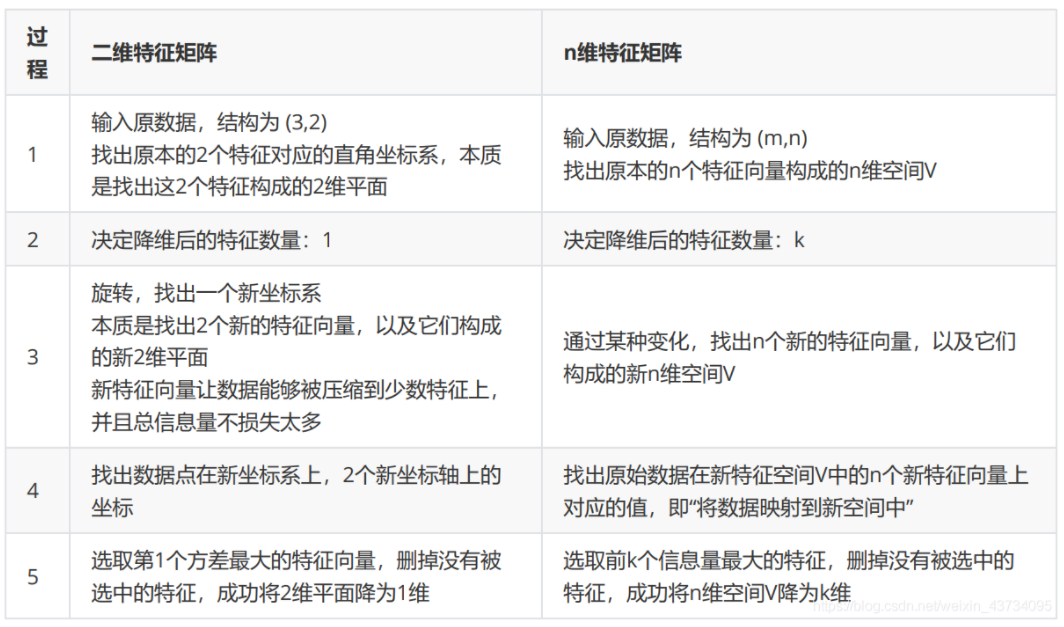

在步骤3当中，我们用来**找出n个新特征向量，让数据能够被压缩到少数特征上并且总信息量不损失太多的技术就是矩阵分解。**

PCA和SVD是两种不同的降维算法，但他们都遵从上面的过程来实现降维，只是两种算法中矩阵分解的方法不同，信息量的衡量指标不同罢了。  

 Principal Components Analysis (PCA)  主成分分析    
 Singular Value Decomposition (SVD)  奇异值分解

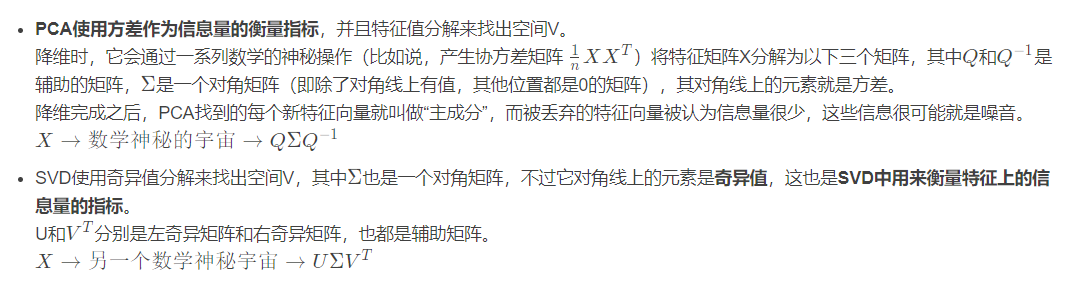

在数学原理中，无论是PCA和SVD都需要遍历所有的特征和样本来计算信息量指标。并且在矩阵分解的过程之中，会产生比原来的特征矩阵更大的矩阵，比如原数据的结构是(m,n)，在矩阵分解中为了找出最佳新特征空间V，可能需要产生(n,n)，(m,m)大小的矩阵，还需要产生协方差矩阵去计算更多的信息。而现在无论是Python还是R，或者其他的任何语言，在大型矩阵运算上都不是特别擅长，无论代码如何简化，我们不可避免地要等待计算机去完成这个非常庞大的数学计算过程。因此，**降维算法的计算量很大，运行比较缓慢，但无论如何，它们的功能无可替代，它们依然是机器学习领域的宠儿。**   

---
* **思考：PCA和特征选择技术都是特征工程的一部分，它们有什么不同？**  

特征工程中有三种方式：特征提取，特征创造和特征选择。    
**特征选择是从已存在的特征中选取携带信息最多的，选完之后的特征依然具有可解释性，我们依然知道这个特征在原数据的哪个位置，代表着原数据上的什么含义。**

而PCA，是将已存在的特征进行压缩，**降维完毕后的特征不是原本的特征矩阵中的任何一个特征，而是通过某些方式组合起来的新特征。** 通常来说，**在新的特征矩阵生成之前，我们无法知晓PCA都建立了怎样的新特征向量，新特征矩阵生成之后也不具有可读性，** 我们无法判断新特征矩阵的特征是从原数据中的什么特征组合而来，新特征虽然带有原始数据的信息，却已经不是原数据上代表着的含义了。**以PCA为代表的降维算法因此是特征创造（feature creation，或feature construction）的一种。**

可以想见，PCA一般不适用于探索特征和标签之间的关系的模型（如线性回归），因为无法解释的新特征和标签之间的关系不具有意义。在线性回归模型中，我们使用特征选择。

**重要参数**  n_components

n_components是我们降维后需要的降维，即降维后需要保留的特征数量。一般输入 [0,min(X.shape)]范围中的整数，如果留下的特征太多，就达不到降维效果，如果留下的特征太少，新特征向量可能无法容纳原始数据集中的大部分信息，因此n_components即不能太大，也不能太小

#### **迷你案例：高维数据的可视化**

1.调用模块和库

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris   # 鸢尾花数据集
from sklearn.decomposition import PCA

In [30]:
iris = load_iris()

In [31]:
y = iris.target
x = iris.data

In [32]:
x.shape

(150, 4)

In [33]:
import numpy as np
np.unique(y)   # 3种花的类型

array([0, 1, 2])

In [34]:
# 调用PCA
pca = PCA(n_components=2)   # 实例化
pca = pca.fit(x)
x_dr = pca.transform(x)  # fit_transform 一步到位

In [35]:
x_dr[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

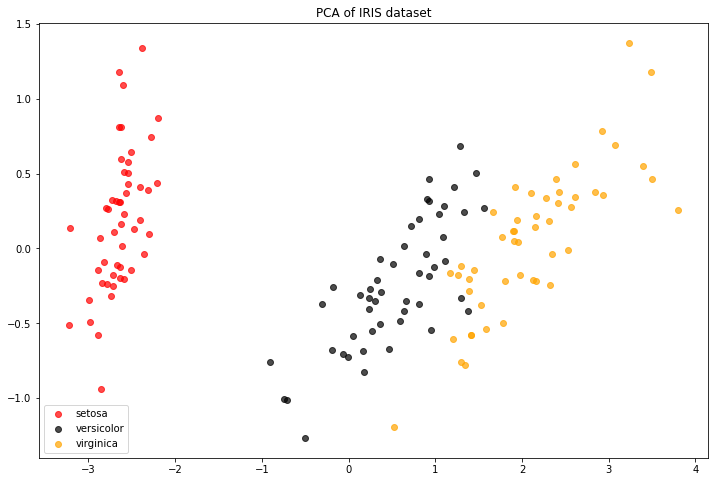

In [36]:
# 可视化
colors = ['red','black','orange']
iris.target_names
plt.figure(figsize=(12,8))
for i in [0,1,2]:
    plt.scatter(x_dr[y==i,0]
               ,x_dr[y==i,1]
               ,alpha=.7    # 画出点的透明度
               ,c=colors[i]
               ,label=iris.target_names[i])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

In [37]:
#属性explained_variance,查看降维后每个新特征向量上所带信息量的大小(可解释性方差的大小)
pca.explained_variance_  # 大多数信息都在第一个特征上

array([4.22824171, 0.24267075])

In [38]:
#属性explained_variance_ratio_,查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
# 又称可解释方差贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [39]:
pca.explained_variance_ratio_.sum()

0.9776852063187949

**选择最好的n_components：累积可解释方差贡献率曲线**

当参数n_components中不填写任何值，则默认返回min(X.shape)个特征，一般样本量都会大于特征数目，所以什么都不填就相当于转换了新特征空间，但没有减少特征的个数。

一般来说，不会使用这种输入方式。但我们却可以使用这种输入方式来画出累计可解释方差贡献率曲线，以此选择最好的n_components的整数取值。

累积可解释方差贡献率曲线：
* 横坐标：降维后保留的特征个数
* 纵坐标：降维后新特征矩阵捕捉到的可解释方差贡献率

累积可解释方差贡献率曲线能够帮助我们决定 n_components 最好的取值。


In [40]:
import numpy as np
pca_line = PCA().fit(x)

# pca_line.transform(X).shape # (150, 4) 特征值个数没有变

# 降维后新特征矩阵捕捉到的可解释方差贡献率
pca_line.explained_variance_ratio_


array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [41]:
np.cumsum(pca_line.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

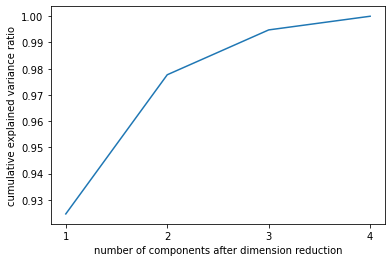

In [42]:
plt.plot([1,2,3,4], np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()
# 当有很多特征的时候，选转折点

**最大似然估计自选超参数**

In [43]:
pca_mle = PCA(n_components="mle")    # 计算量很大，当数据较大时，谨慎使用
pca_mle = pca_mle.fit(x)
X_mle = pca_mle.transform(x)

X_mle
#可以发现，mle为我们自动选择了3个特征

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [44]:
pca_mle.explained_variance_ratio_.sum()
#得到了比设定2个特征时更高的信息含量

0.9947878161267246

**按信息量占比选超参数**

输入[0,1]之间的浮点数，并且让参数svd_solver=="full",表示降维后的总解释性方差大于指定的百分比，即希望保留百分之多少的信息量，比如说我们希望保留97%的信息量，就可以输入n_components=0.97,PCA会自动选出能够让保留信息量超过97%的特征数量

In [46]:
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(x)
x_f = pca_f.transform(x)
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [47]:
pca_f.explained_variance_ratio_.sum()

0.9776852063187949

**PCA中的SVD**

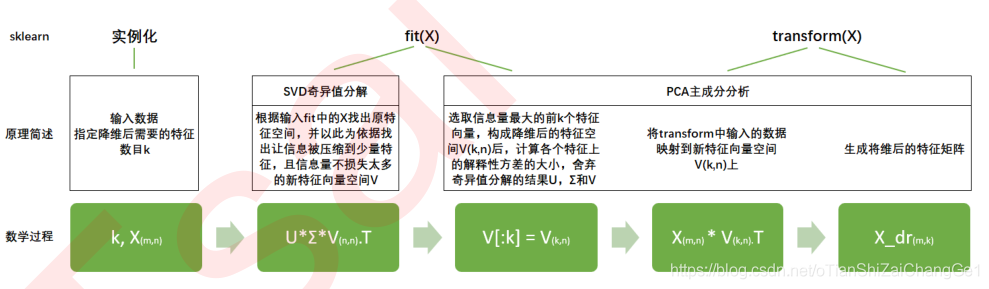

In [48]:
PCA(2).fit(x).components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [49]:
PCA(2).fit(x).components_.shape    #(k,n)

(2, 4)

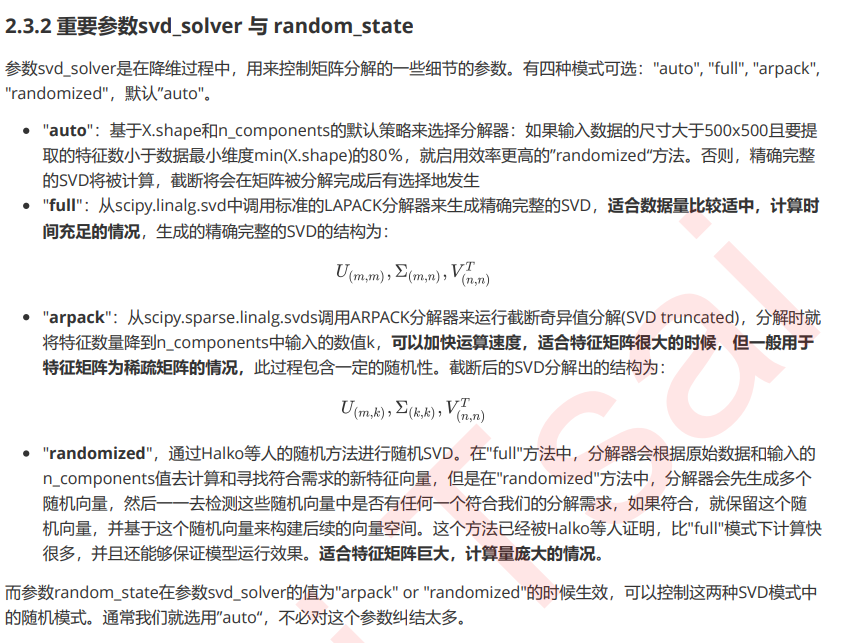

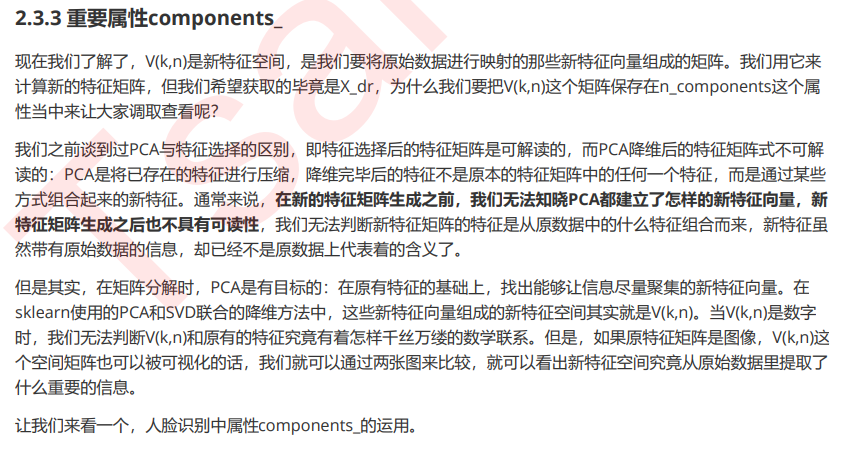

**来看一下，人脸识别中属性components_的应用**

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)  # 实例化  每个人的脸至少需要60张图

In [3]:
faces.data.shape
# 行是样本，列是样本相关的所有特征

(1348, 2914)

In [4]:
faces.images.shape
# 1348 是矩阵中图像的个数
# 62是每个图像特征矩阵的行
# 47是每个图像特征矩阵的列
# 62 * 47 = 2914

(1348, 62, 47)

In [5]:
x = faces.data

**将原特征数据可视化**

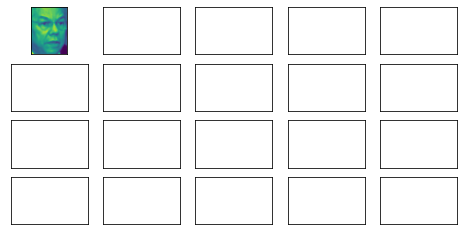

In [11]:
fig,axes=plt.subplots(4,5   # 画布分为几行几列的子图
                    ,figsize=(8,4)  # 画布的大小
                    ,subplot_kw = {"xticks":[],"yticks":[]}  # 不显示坐标轴
                    )
axes[0][0].imshow(faces.images[0,:,:])

In [12]:
axes.flat  # 降维

In [13]:
[*enumerate(axes.flat)]

[(0, <AxesSubplot:>),
 (1, <AxesSubplot:>),
 (2, <AxesSubplot:>),
 (3, <AxesSubplot:>),
 (4, <AxesSubplot:>),
 (5, <AxesSubplot:>),
 (6, <AxesSubplot:>),
 (7, <AxesSubplot:>),
 (8, <AxesSubplot:>),
 (9, <AxesSubplot:>),
 (10, <AxesSubplot:>),
 (11, <AxesSubplot:>),
 (12, <AxesSubplot:>),
 (13, <AxesSubplot:>),
 (14, <AxesSubplot:>),
 (15, <AxesSubplot:>),
 (16, <AxesSubplot:>),
 (17, <AxesSubplot:>),
 (18, <AxesSubplot:>),
 (19, <AxesSubplot:>)]

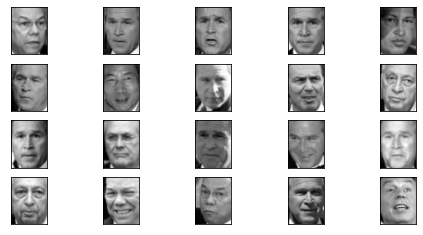

In [15]:
# 人脸识别中这串代码必然会用到
fig,axes=plt.subplots(4,5   # 画布分为几行几列的子图
                    ,figsize=(8,4)  # 画布的大小
                    ,subplot_kw = {"xticks":[],"yticks":[]}  # 不显示坐标轴
                    )
for i,ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:],cmap='gray')  

In [21]:
x.shape

(1348, 2914)

**建模降维，提取新特征空间矩阵**

In [23]:
pca = PCA(150).fit(x)  # 只要150维

In [24]:
pca.transform(x).shape

(1348, 150)

In [17]:
v = pca.components_

In [18]:
v.shape

(150, 2914)

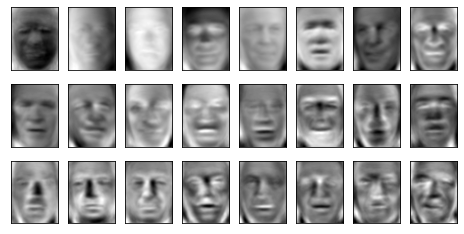

In [20]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(v[i,:].reshape(62,47),cmap="gray")

**重要接口inverse_transform**

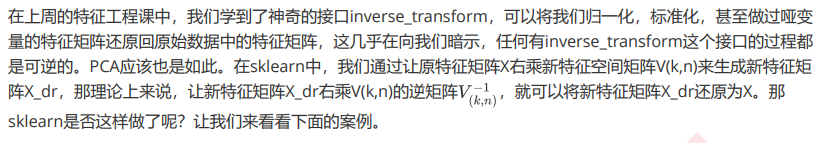

**迷你案例：用人脸识别看PCA降维后的信息保存量**

人脸识别是最容易的，用来探索inverse_transform功能的数据。我们先调用一组人脸数据X(m,n)，对人脸图像进
行绘制，然后我们对人脸数据进行降维得到X_dr，之后再使用inverse_transform(X_dr)返回一个X_inverse(m,n)，
并对这个新矩阵中的人脸图像也进行绘制。如果PCA的降维过程是可逆的，我们应当期待X(m,n)和X_inverse(m,n)
返回一模一样的图像，即携带一模一样的信息。

In [25]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [26]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape
#怎样理解这个数据的维度？
faces.data.shape
#换成特征矩阵之后，这个矩阵是什么样？
X = faces.data

建模降维，获取降维后的特征矩阵X_dr

In [27]:
pca = PCA(150)
X_dr = pca.fit_transform(X)
X_dr.shape

(1348, 150)

将降维后矩阵用inverse_transform返回原空间

In [28]:
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape

(1348, 2914)